In [3]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.load_iris()
df_features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# 標準化
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [5]:
# 主成分分析
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_std)
pca_array

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

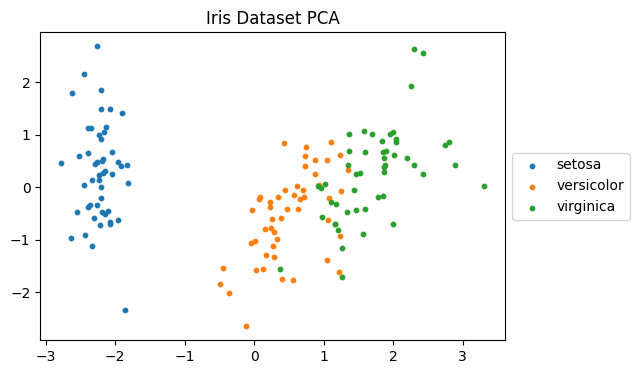

In [6]:
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(
    111,
    title='Iris Dataset PCA'
)

for target in np.unique(dataset.target):
    idx = np.where(dataset.target==target)
    ax.scatter(pca_array[idx,0], pca_array[idx,1], s=10, label=dataset.target_names[target])

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

決定木

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [27]:
df_X = df_std.iloc[:, 2:]
df_y = pd.DataFrame(dataset.target, columns=['target'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y.target, test_size=0.3, random_state=0)

In [29]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

プロット

In [13]:
from mlxtend.plotting import plot_decision_regions
from sklearn import tree

c:\Users\Kimura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


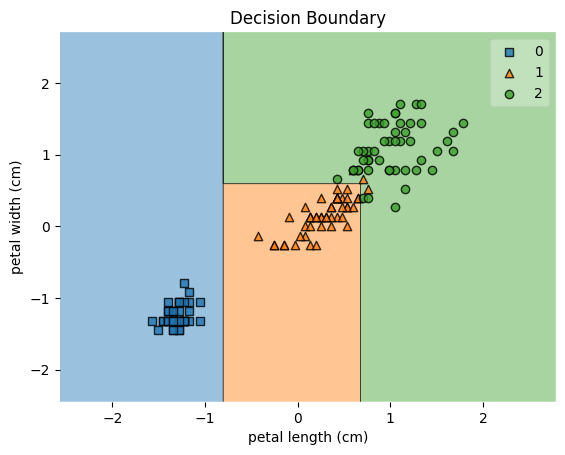

In [40]:
plot_decision_regions(np.array(df_X), np.array(df_y).reshape(-1), clf=clf)
plt.xlabel(dataset.feature_names[2:][0])
plt.ylabel(dataset.feature_names[2:][1])
plt.title('Decision Boundary')
plt.show()

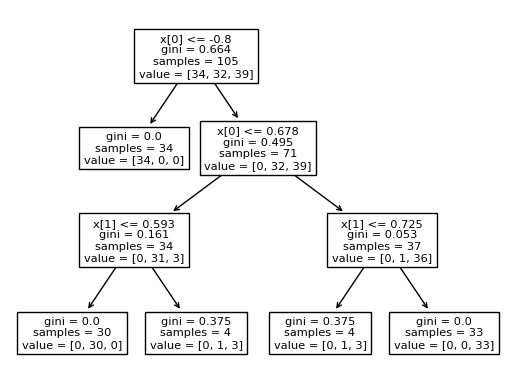

In [41]:
tree.plot_tree(clf)
plt.show()